In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

def drowac(h) :
    plt.figure(figsize=(9,6))
    plt.grid(True)
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def drowls(h) :
    plt.figure(figsize=(9,6))
    plt.grid(True)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def neural_net (model):
    model.add(Dense(25, input_dim=13, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    hist = model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test))
    return hist
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep = ',', names = ['Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
X_col = [col for col in data.columns if col != 'Class']
X = data[X_col]
Y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 10)
model = Sequential()
hist = neural_net (model)

Train on 160 samples, validate on 18 samples
Epoch 1/500
160/160 [==============================] - 0s 3ms/step - loss: -3.6097 - acc: 0.1938 - val_loss: -10.6586 - val_acc: 0.3333
Epoch 2/500
160/160 [==============================] - 0s 38us/step - loss: -11.2532 - acc: 0.3000 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 3/500
160/160 [==============================] - 0s 31us/step - loss: -13.1812 - acc: 0.2750 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 4/500
160/160 [==============================] - 0s 38us/step - loss: -13.3629 - acc: 0.3250 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 5/500
160/160 [==============================] - 0s 38us/step - loss: -13.2910 - acc: 0.3125 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 6/500
160/160 [==============================] - 0s 38us/step - loss: -14.4224 - acc: 0.3188 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 7/500
160/160 [==============================] - 0s 44us/step - loss: -15.2757 - acc: 0.3312 - val_loss: -11.5139 - val_acc

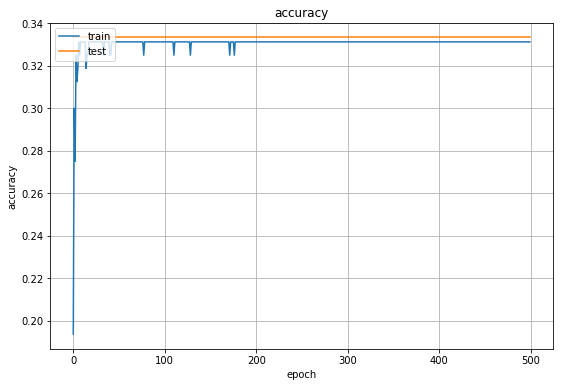

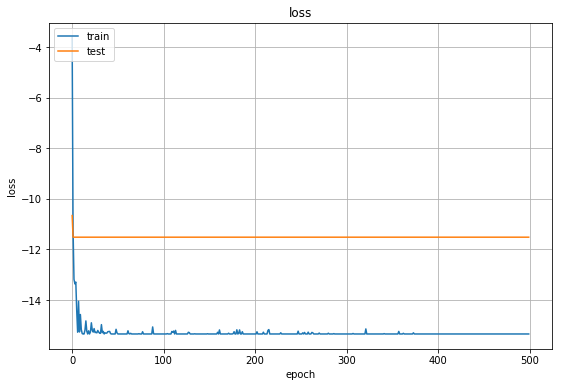

In [10]:
drowac(hist)
drowls(hist)

In [11]:
hist_list = []

for part in np.linspace(0.33,1,num=3) :
    print('part %s' % part)
    element_cnt = int(x_train.shape[0] * part)
    x_part_train = x_train[ :element_cnt]
    y_part_train = y_train[ :element_cnt]
    model = Sequential()
    hist = neural_net (model)
    hist_list.append(hist.history)

part 0.33
Train on 160 samples, validate on 18 samples
Epoch 1/500
160/160 [==============================] - 0s 3ms/step - loss: 21.4363 - acc: 0.0813 - val_loss: 27.6097 - val_acc: 0.0000e+00
Epoch 2/500
160/160 [==============================] - 0s 38us/step - loss: 18.7510 - acc: 0.0563 - val_loss: 19.8380 - val_acc: 0.0000e+00
Epoch 3/500
160/160 [==============================] - 0s 38us/step - loss: 11.6125 - acc: 0.0938 - val_loss: -6.2836 - val_acc: 0.3333
Epoch 4/500
160/160 [==============================] - 0s 31us/step - loss: -0.5331 - acc: 0.2063 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 5/500
160/160 [==============================] - 0s 44us/step - loss: -8.9086 - acc: 0.2750 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 6/500
160/160 [==============================] - 0s 38us/step - loss: -13.0381 - acc: 0.3188 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 7/500
160/160 [==============================] - 0s 38us/step - loss: -13.2040 - acc: 0.3125 - val_loss: -11.513

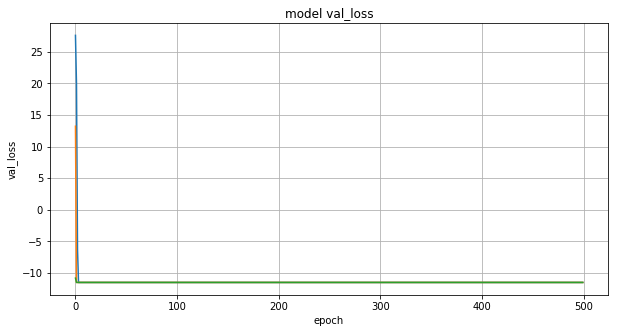

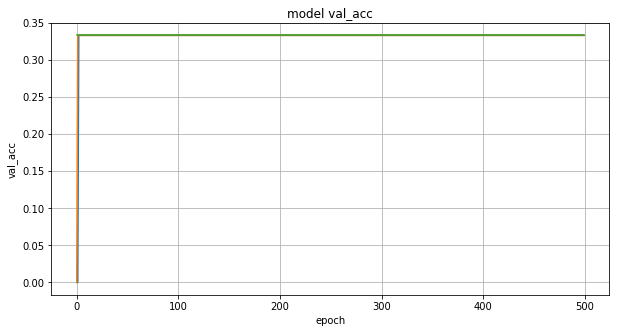

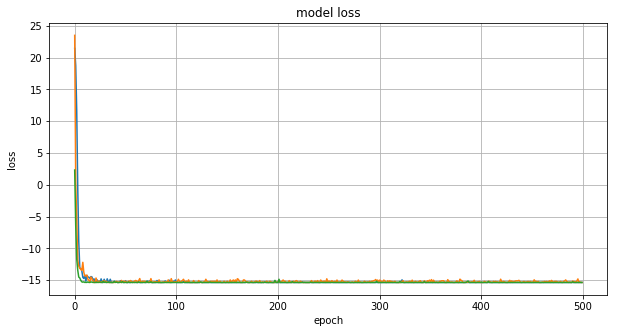

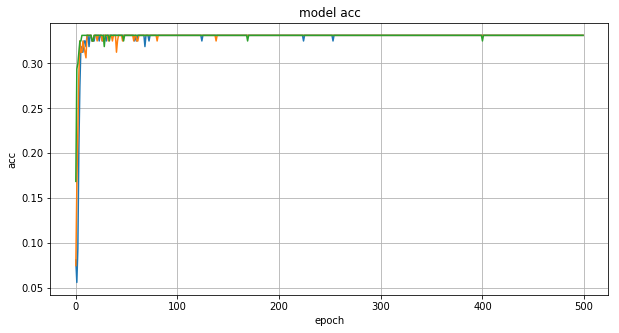

In [12]:
for key in hist_list[0].keys() :
    plt.figure(figsize=(10,5))
    plt.grid(True)
    plt.title('model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')
    for hist in hist_list :
        plt.plot(hist[key])
    plt.show()

In [13]:
hist_list = []

for noise_koef in np.linspace(0,1,num=5) :
    noise = np.random.normal(loc=0.5,scale=0.16,size=x_train.shape)
    x_part_noise = x_train + noise_koef * noise
    model = Sequential()
    hist = neural_net (model)
    hist_list.append(hist.history)

Train on 160 samples, validate on 18 samples
Epoch 1/500
160/160 [==============================] - 1s 4ms/step - loss: -14.9827 - acc: 0.3312 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 2/500
160/160 [==============================] - 0s 38us/step - loss: -15.1985 - acc: 0.3312 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 3/500
160/160 [==============================] - 0s 44us/step - loss: -15.3445 - acc: 0.3312 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 4/500
160/160 [==============================] - 0s 50us/step - loss: -15.2638 - acc: 0.3312 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 5/500
160/160 [==============================] - 0s 63us/step - loss: -15.3445 - acc: 0.3312 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 6/500
160/160 [==============================] - 0s 44us/step - loss: -15.3445 - acc: 0.3312 - val_loss: -11.5139 - val_acc: 0.3333
Epoch 7/500
160/160 [==============================] - 0s 38us/step - loss: -15.3445 - acc: 0.3312 - val_loss: -11.5139 - val_ac

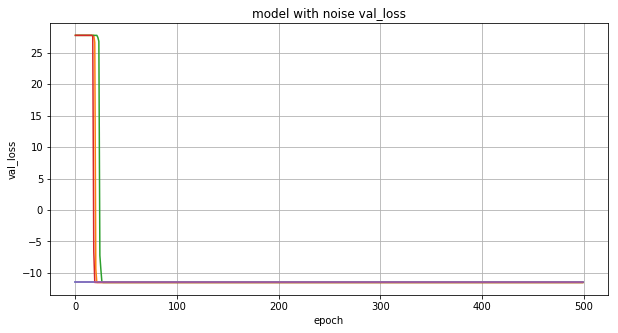

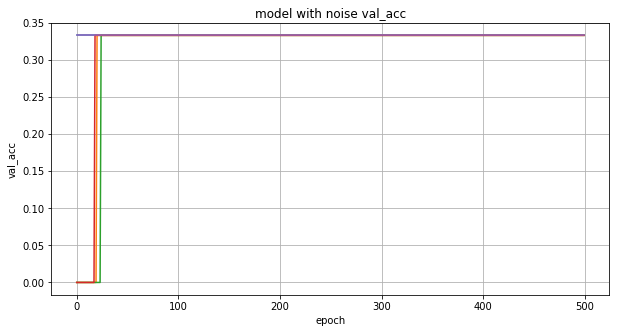

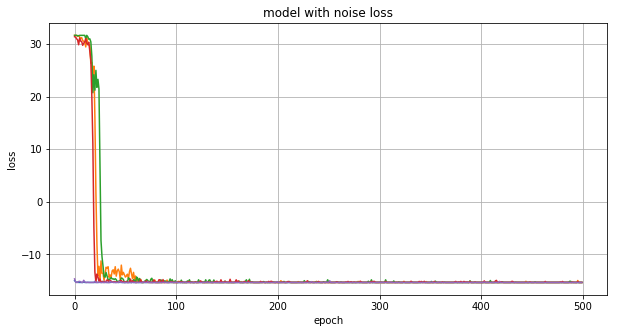

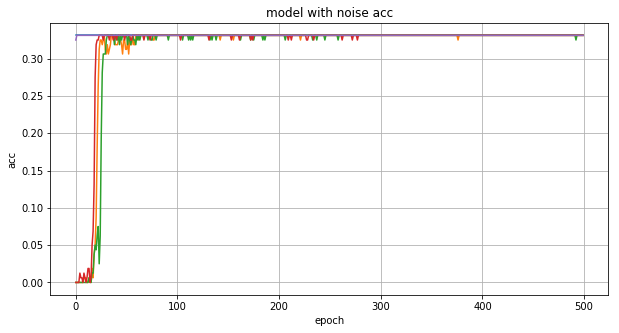

In [14]:
for key in hist_list[0].keys() :
    plt.figure(figsize=(10,5))
    plt.grid(True)    
    plt.title('model with noise ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')
    for hist in hist_list :
        plt.plot(hist[key])
    plt.show()